This side project is based on the dataset 'Most Streamed Spotify Songs 2023'

You can find the dataset on Kaggle:
https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

The purpose of this project is to build a model that predicts 'streams'.

Here are the steps:

1.Importing the dataset and library

2.Data Inspection

3.Data Cleaning

4.Exploratory Data Analysis

5.Predicting Model

6.Summary and Conclusion

#Importing the dataset and libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# some settings to improve visibility
pd.set_option('display.max_columns', None)  # This will show all columns.
pd.set_option('display.expand_frame_repr', False)  # This will ensure that the DataFrame doesn't wrap around when displayed.

# load the dataset
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# show the first few rows
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


#Data Inspection

In [3]:
# check the shape of the dataframe
print('dataframe shape: ', spotify_data.shape)

# data types of the columns
print('\ncolumn data types:\n',spotify_data.dtypes)

dataframe shape:  (953, 24)

column data types:
 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


You can see that the dataframe is consisted with object and int64.

There are some columns that needed to be transfered into numeric datatypes

1. streams

2. key

3. in_deezer_playlists

4. in_shazam_charts

5. mode

In [4]:
# summary
print('summary:\n',spotify_data.describe())

summary:
        artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts  in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  danceability_%   valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
count    953.000000     953.000000      953.000000    953.000000            953.000000         953.000000          953.000000       953.000000        953.000000  953.000000       953.00000  953.000000  953.000000      953.000000          953.000000  953.000000     953.000000
mean       1.556139    2018.238195        6.033578     13.930745           5200.124869          12.009444           67.812172        51.908709          2.666317  122.540399        66.96957   51.431270   64.279119       27.057712            1.581322   18.213012      10.131165
std        0.893044      11.116218        3.566435      9.201949           7897.608990          19.575992           86.441493        50.630241          6.035599  

In [5]:
# check for missing values
print('\nMissing values in each column:\n', spotify_data.isnull().sum())


Missing values in each column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


There are missing values in 'in_shazam_charts' and 'key'.

#Data Cleaning

The dataset contains null values from the columns in_shazam_charts and key. For the null values in the in_shazam_charts column, it is possible that these songs have the most number of streams but did not hit the charts in Shazam.

Based on Spotify for Developers, it says 'The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.'

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [6]:
# Combined 'released_year', 'released_month', 'released_day'
spotify_data['released_date'] = pd.to_datetime(spotify_data['released_year'].astype(str) + '-' +
                        spotify_data['released_month'].astype(str) + '-' +
                        spotify_data['released_day'].astype(str), errors='coerce')

# Drop the original year, month, and day columns
spotify_data.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)

# Convert the date to a numerical value: the number of days since the first date in the dataset.
spotify_data['released_date'] = (spotify_data['released_date'] - spotify_data['released_date'].min()).dt.days

spotify_data['released_date'].head()

0    34162
1    34049
2    34148
3    32741
4    34105
Name: released_date, dtype: int64

In [7]:
# One-hot encode the 'mode' column
mode_dummies = pd.get_dummies(spotify_data['mode'], prefix='mode')

# Concatenate the new columns with the original DataFrame
spotify_data = pd.concat([spotify_data, mode_dummies], axis=1)

# Optionally, you can drop the original 'mode' column
spotify_data.drop('mode', axis=1, inplace=True)

I might consider missing values in 'in_shazam_charts' indicates that it's rank isn't good enough to enter the charts. Therefore, I'll replace the missing values with maximum(in_shazam_charts)+1

In [8]:
# Convert in_shazam_charts into float
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].replace(',','',regex=True).astype(float)

# Find the max
max = spotify_data['in_shazam_charts'].max()

# Replace NaN
spotify_data['in_shazam_charts'].fillna(max+1, inplace=True)

In [9]:
# Replace null values in 'key' column into -1
spotify_data['key'] = spotify_data['key'].fillna(-1)

In [10]:
# Replace invalid data in the 'stream' column into null
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

In [11]:
# transfer keys into numeric datatype
key_num = {
    'C':0,
    'C#':1,
    'D':2,
    'D#':3,
    'E':4,
    'F':5,
    'F#':6,
    'G':7,
    'G#':8,
    'A':9,
    'A#':10,
    'B':11
}

spotify_data['key'] = spotify_data['key'].map(key_num).fillna(-1)
spotify_data['key'].head()

0    11.0
1     1.0
2     5.0
3     9.0
4     9.0
Name: key, dtype: float64

In [12]:
# transfomr column 'in_deezer_playlists' and 'in_shazam_charts'
spotify_data['in_deezer_playlists'] = spotify_data['in_deezer_playlists'].replace(',', '', regex=True).astype('int64')
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].replace(',', '', regex=True).astype('int64')

In [13]:
# Drop the null value in the 'streams' column
spotify_data = spotify_data.dropna(how='any')

In [14]:
# Check again
spotify_data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_date           0
mode_Major              0
mode_Minor              0
dtype: int64

In [15]:
# Check the dtypes
spotify_data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts          int64
bpm                       int64
key                     float64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
released_date             int64
mode_Major                uint8
mode_Minor                uint8
dtype: object

In [16]:
# Make a copy of the DataFrame to ensure you're not working with a view
spotify_data = spotify_data.copy()

# Convert columns to 'int64' using .loc to avoid the DeprecationWarning
spotify_data.loc[:, 'key'] = spotify_data['key'].astype('int64')
spotify_data.loc[:, 'streams'] = spotify_data['streams'].astype('int64')

<ipython-input-16-718f11e9e161>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  spotify_data.loc[:, 'key'] = spotify_data['key'].astype('int64')
<ipython-input-16-718f11e9e161>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  spotify_data.loc[:, 'streams'] = spotify_data['streams'].astype('int64')


In [17]:
# Check if there's duplicate rows
duplicates = spotify_data.duplicated()

# Remove duplicate rows
spotify_data = spotify_data[~duplicates]

In [18]:
# Drop the nonnumeric columns
spotify_data = spotify_data.drop(['artist(s)_name', 'track_name'], axis=1)

In [19]:
# Check the data again
spotify_data.dtypes

artist_count            int64
in_spotify_playlists    int64
in_spotify_charts       int64
streams                 int64
in_apple_playlists      int64
in_apple_charts         int64
in_deezer_playlists     int64
in_deezer_charts        int64
in_shazam_charts        int64
bpm                     int64
key                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
released_date           int64
mode_Major              uint8
mode_Minor              uint8
dtype: object

In [20]:
# Check the data again
spotify_data.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,mode_Major,mode_Minor
0,2,553,147,141381703,43,263,45,10,826,125,11,80,89,83,31,0,8,4,34162,1,0
1,1,1474,48,133716286,48,126,58,14,382,92,1,71,61,74,7,0,10,4,34049,1,0
2,1,1397,113,140003974,94,207,91,14,949,138,5,51,32,53,17,0,31,6,34148,1,0
3,1,7858,100,800840817,116,207,125,12,548,170,9,55,58,72,11,0,11,15,32741,1,0
4,1,3133,50,303236322,84,133,87,15,425,144,9,65,23,80,14,63,11,6,34105,0,1


# Exploratory Data Analysis

Let's see how 'streams' is distributed


count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


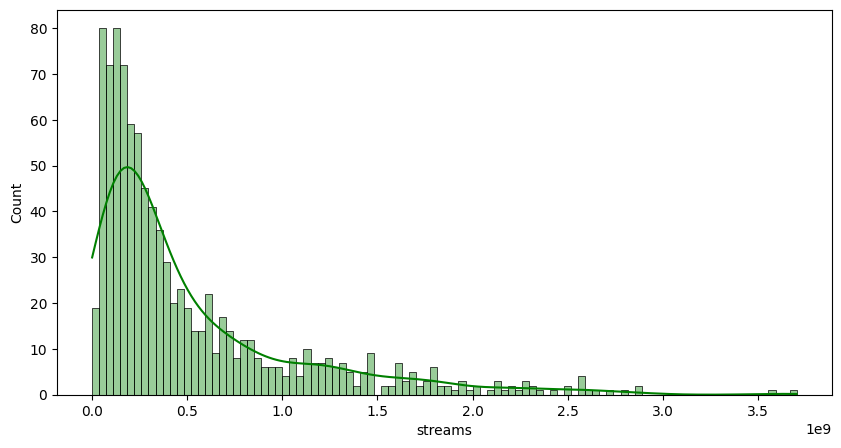

In [21]:
# Provides the summary of streams
print(spotify_data['streams'].describe())

#plt.figure():is used to create a new figure
plt.figure(figsize=(10, 5)) #寬、長(單位為inch)

#plot a histogram
sns.histplot(data=spotify_data['streams'], color='g',bins=100, alpha=0.4, kde=True)

#display the created plot
plt.show()

You can see that the 'streams' is skewed right.

Now, let's plot the histograms of the rest varibles

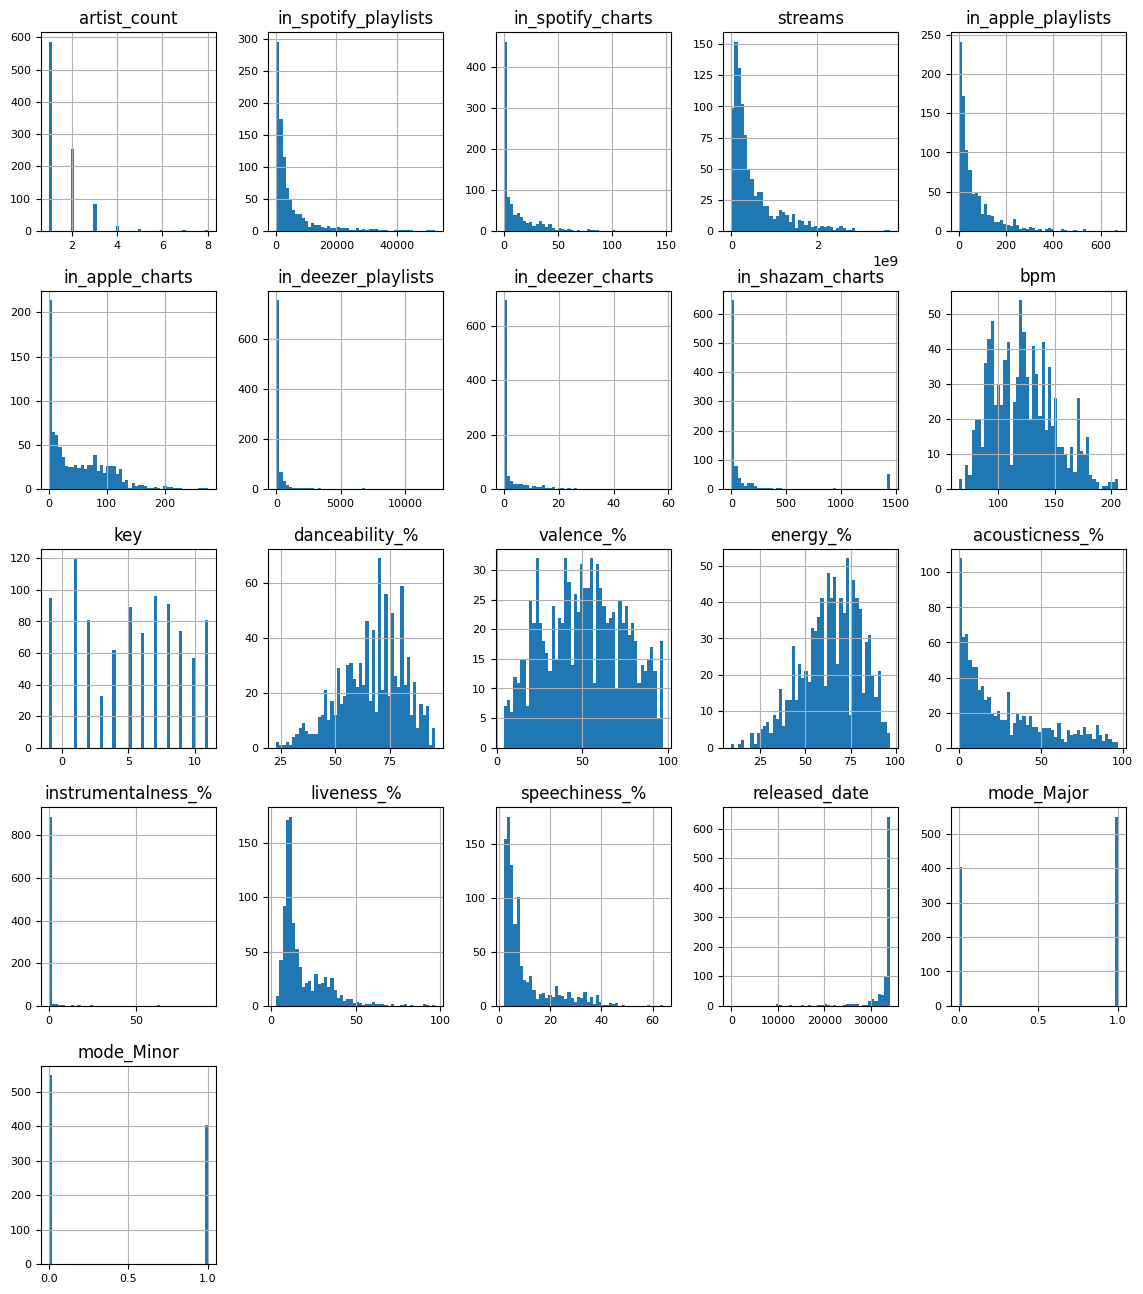

In [22]:
# plot all the histograms
spotify_data.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8);

There are a few things that you can discover from the histograms:

1. 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'are positively skewed  indicating most tracks are included in fewer playlists, with some tracks being outliers with high inclusion counts.

2. 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'are similar to playlist inclusions, which are also positively skewed.

3. 'streams' is also highly positively skewed.

In order to reduce the dimensionality, i will combine ''in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists' into one column 'total_playlist'.
And combine 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts' into one column 'total_charts'.

In [23]:
spotify_data['total_playlist'] = spotify_data['in_spotify_playlists'] + \
                       spotify_data['in_apple_playlists'] + \
                       spotify_data['in_deezer_playlists']

spotify_data.drop(['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'], axis=1, inplace=True)

In [24]:
spotify_data['total_charts'] = spotify_data['in_spotify_charts'] + \
                 spotify_data['in_apple_charts'] + \
                 spotify_data['in_deezer_charts'] + \
                 spotify_data['in_shazam_charts']

spotify_data.drop(['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts'], axis=1, inplace=True)

Lets' check the correlation between features and target variable 'streams' in order to identify any potential feature interactions that may be useful.



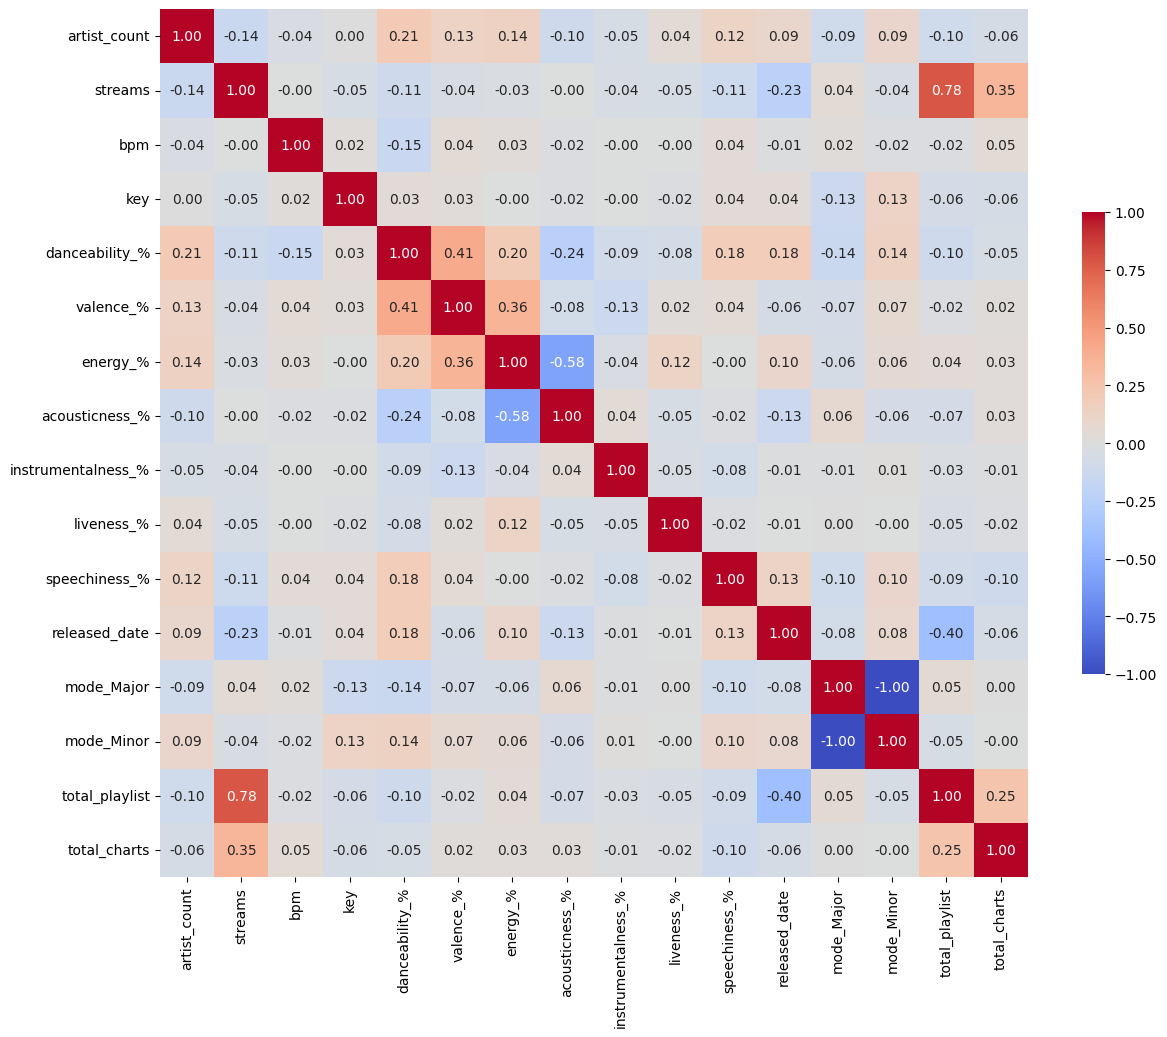

In [25]:
# Correlation matrix
correlation_matrix = spotify_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

According to the correlation matrix, you can notice that
1. There is strong positive correlation  between 'total_playlist' and 'streams', this indicates that the song included in more playlist tend to have higher stream counts.
2. There is a moderate positive correlation between 'total_charts' and 'streams.

##Predicting Model

Next, we'll build a predicting model to forecast 'streams'.

In [26]:
spotify_data.dtypes

artist_count          int64
streams               int64
bpm                   int64
key                   int64
danceability_%        int64
valence_%             int64
energy_%              int64
acousticness_%        int64
instrumentalness_%    int64
liveness_%            int64
speechiness_%         int64
released_date         int64
mode_Major            uint8
mode_Minor            uint8
total_playlist        int64
total_charts          int64
dtype: object

In this project, I'll first choose Random Forest for predicting.

Since the dataset have many features and potential multicollinearity issues, and random forest can handle non-linear relationship.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Set up Features and Target Variables
X = spotify_data.drop('streams', axis=1)
y = spotify_data['streams']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


mse:  4.908498539663091e+16
r2:  0.799483546892173
total_playlist        0.782289
released_date         0.086643
total_charts          0.028575
liveness_%            0.015802
energy_%              0.013552
valence_%             0.013371
bpm                   0.012739
danceability_%        0.011383
acousticness_%        0.011304
key                   0.009658
speechiness_%         0.006522
artist_count          0.003506
instrumentalness_%    0.002336
mode_Minor            0.001215
mode_Major            0.001102
dtype: float64


Let's try GridSearch to see if we can optimize the hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV

# Example RandomForestRegressor model (replace with your actual model)
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Define X and y
X = spotify_data.drop('streams', axis=1)
y = spotify_data['streams']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# After fitting, find the best parameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best parameters
print("Best Parameters Found: ", best_params)

# Model Evaluation
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters Found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
mse:  4.793956111184216e+16
r2:  0.8041627051527596


In [30]:
# Feature importance
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

total_playlist        0.787188
released_date         0.087852
total_charts          0.026495
liveness_%            0.015512
energy_%              0.012489
valence_%             0.012364
bpm                   0.011967
acousticness_%        0.011952
danceability_%        0.011329
key                   0.009107
speechiness_%         0.006023
artist_count          0.003133
instrumentalness_%    0.002443
mode_Major            0.001074
mode_Minor            0.001073
dtype: float64


Scatterplot between y_pred and y_test

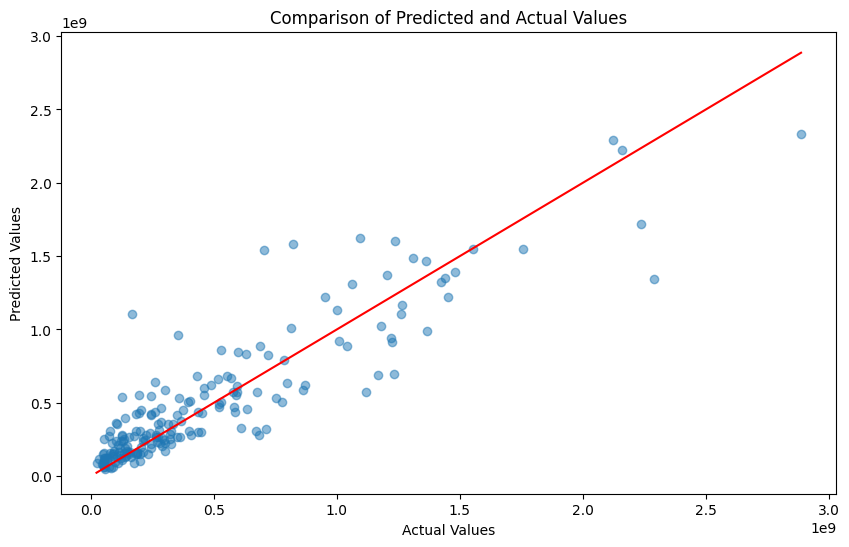

In [31]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red') # Diagonal line
plt.show()

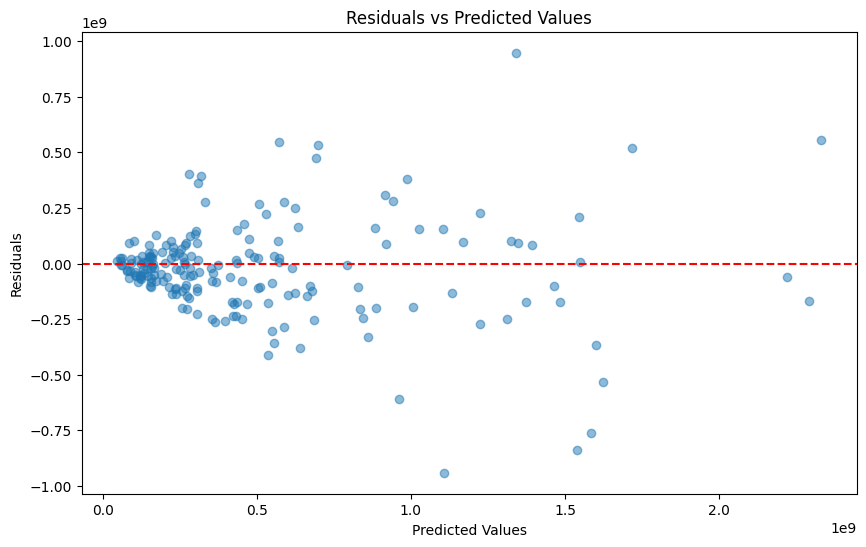

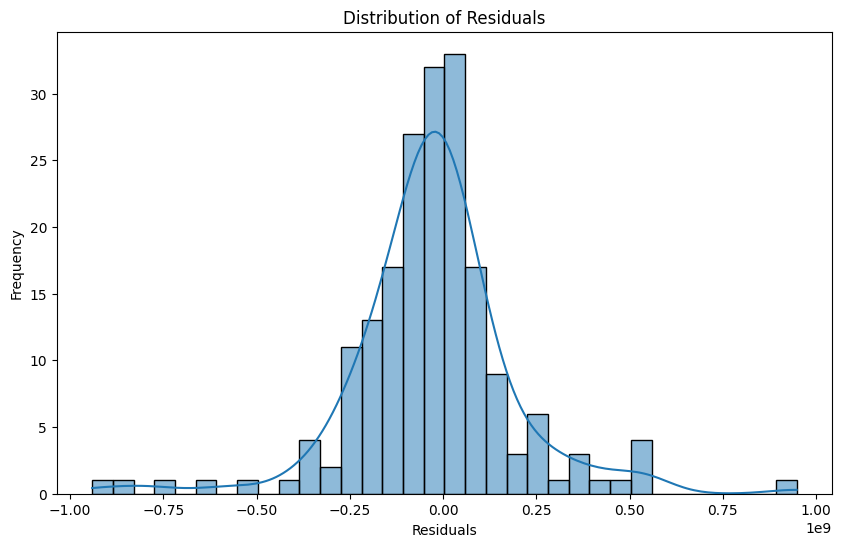

In [32]:
# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Checking the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

According to the results:
1. The scatterplot of residuals with predicted values shows no clear pattern, which might indicates that residuals are randomly distributed, which is a good sign. But it also shows heteroscedasticity.

2. The histogram of residuals appears somewhat normally distributed around zero, which is good.However, the distribution has multiple peaks, which is not ideal since we would expect a single bell-shaped curve.


##Summary and Conclusion

Objective Recap:

The purpose of this analysis was to dive into the 'Most Streamed Spotify Songs of 2023' dataset with the aim of understanding streaming trends and developing a model to predict stream counts.

Data Summary:

Our dataset comprised about 900 records, each representing individual tracks with attributes including artist name, release date, and various metrics of streaming performance. After thorough data cleaning which included handling missing values, encoding categorical variables, we prepared the dataset for further analysis.

Methodology:

We implemented a Random Forest Regressor to model the relationship between a song's features and its stream counts. This approach was chosen for its robustness to outliers and its ability to handle non-linear relationships. Grid Search was employed for hyperparameter tuning to enhance model performance.

Model Performance:

Our final model achieved an R-squared value of 0.80, indicating a strong fit to the data. However, residual analysis suggested the presence of heteroscedasticity, implying potential improvements in model structure or feature engineering could enhance predictions.

Insights and Implications:

The analysis highlighted that playlist inclusion and certain musical qualities are strong predictors of streaming success. This insight could guide artists and producers towards creating content with characteristics that align with these trends.

Limitations:

While our model performed well, there were limitations to consider. The analysis was constrained by the data available; streaming patterns can be influenced by external factors not captured in our dataset, such as social media trends or viral challenges.

Recommendations:

We recommend that stakeholders consider both the quantitative data and qualitative factors such as social media presence when predicting a song's success. Future campaigns should leverage the insights gained to strategically promote content.

Future Work:

To further refine our predictions, subsequent analyses could incorporate time-series data to account for trends over time. Additionally, incorporating data from other platforms could provide a more holistic view of a song's popularity.

Conclusion:

In conclusion, this project has shed light on the characteristics of highly streamed songs on Spotify in 2023. While there are opportunities for model refinement, our analysis provides a solid foundation for understanding and predicting streaming performance.

